# 1.Analyse exploratoire

 # Objectif de notre analyse
 Comprendre au maximum nos donnees, Developper une premiere strategie de modelisation

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [94]:
data = pd.read_excel('titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [95]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [96]:
len(data)

1309

In [97]:
data.shape

(1309, 14)

Notre dataset comprend 1309 echantillons et 14 variables

# 1.a. Analyse de la forme

In [98]:
df = data.copy()

In [99]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [101]:
df.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

<AxesSubplot:ylabel='None'>

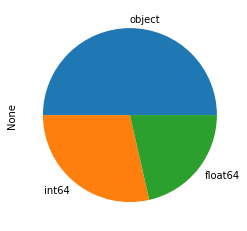

In [102]:
df.dtypes.value_counts().plot.pie()

In [103]:
df.isna()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1303,False,False,False,False,True,False,False,False,False,True,False,True,True,True


In [104]:
pd.set_option('display.max_row',14)
pd.set_option('display.min_row',14)

In [105]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:>

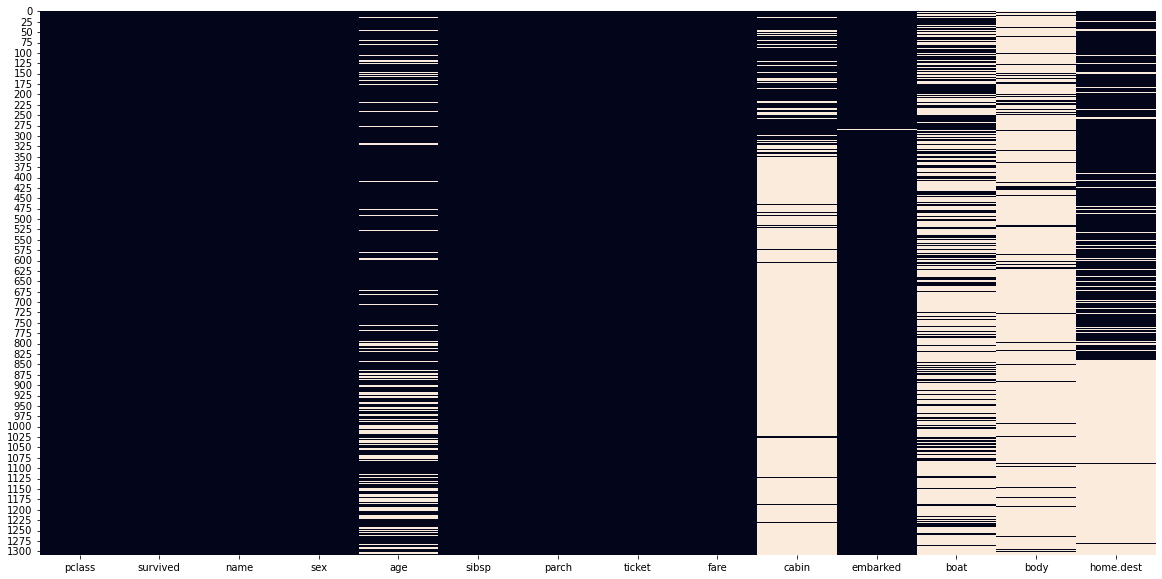

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [107]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

# 1.b. Analyse de fond

# Elimination des colonnes inutiles

In [108]:
df = df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

In [109]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [110]:
df.shape

(1309, 13)

<AxesSubplot:>

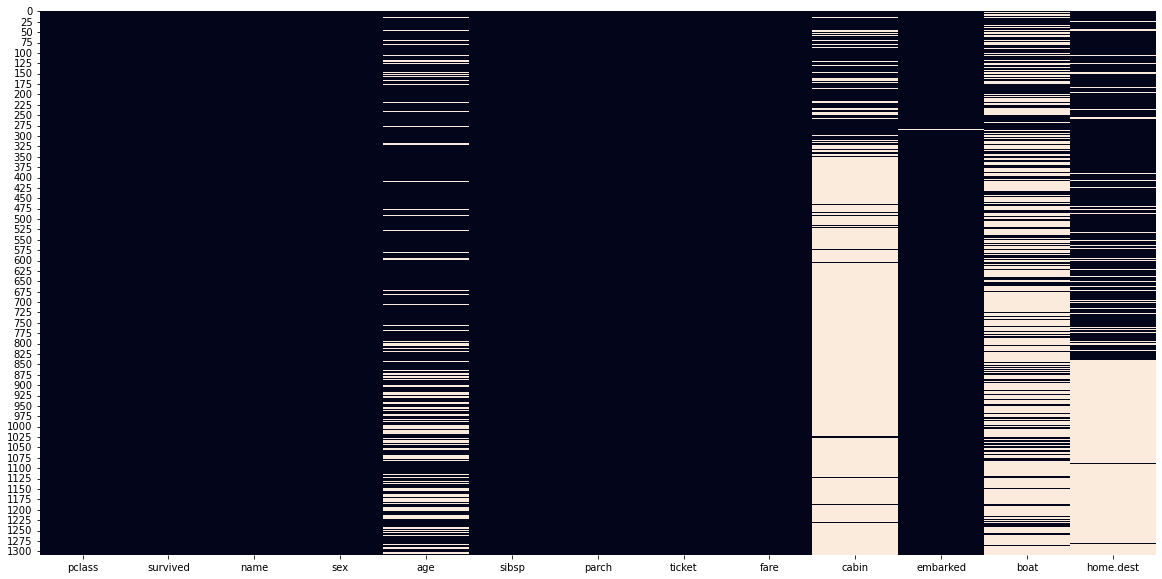

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

# Visualisation de la target

In [112]:
df['survived'].value_counts()/df.shape[0]

0    0.618029
1    0.381971
Name: survived, dtype: float64

<Figure size 144x144 with 0 Axes>

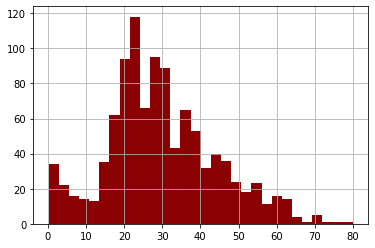

<Figure size 144x144 with 0 Axes>

In [113]:
df['age'].hist(color='darkred',bins=30)
plt.figure(figsize=(2,2))

In [114]:
df = df.drop(['name','home.dest'],axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN


In [115]:
df['survived'] = df['survived'].map({0:'Decede',1:'Survecu'})
df['pclass'] = df['pclass'].map({1:'classe1',2:'classe2',3:'classe3'})

In [116]:
df['survived'].value_counts(normalize=True)

Decede     0.618029
Survecu    0.381971
Name: survived, dtype: float64

In [117]:
df['pclass'].value_counts(normalize=True)

classe3    0.541635
classe1    0.246753
classe2    0.211612
Name: pclass, dtype: float64

In [118]:
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,classe1,Survecu,female,29.0000,0,0,24160,211.3375,B5,S,2
1,classe1,Survecu,male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,classe1,Decede,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,classe1,Decede,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,classe1,Decede,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
5,classe1,Survecu,male,48.0000,0,0,19952,26.5500,E12,S,3
6,classe1,Survecu,female,63.0000,1,0,13502,77.9583,D7,S,10
...,...,...,...,...,...,...,...,...,...,...,...
1302,classe3,Decede,male,NaN,0,0,2647,7.2250,NaN,C,NaN
1303,classe3,Decede,male,NaN,0,0,2627,14.4583,NaN,C,NaN


# Signification de nos variables: Histogramme variable continue

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


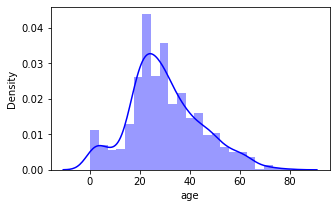

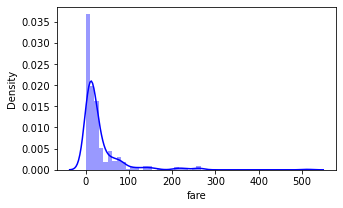

In [119]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(5,3))
    sns.distplot(df[col],color='blue')

Les Variables sont asymetriques et ne suivent pas une loi normale.
Pour l'age,la majorite des gens qui se trouvaient a bord avaient entre 20 et 30 ans.
Pour le prix du ticket, la majorite des gens voyageaient pour un prix moins cher.

# Variable Qualitative

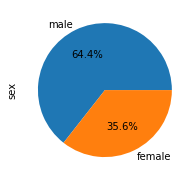

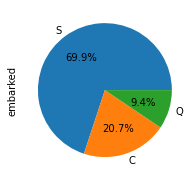

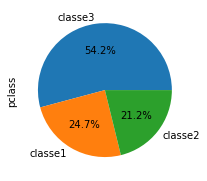

In [120]:
sex_embarked_pclass=['sex','embarked','pclass']
for col in sex_embarked_pclass:
    plt.figure(figsize=(3,4))
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# Relation Feature

In [121]:
df.corr()

,age,sibsp,parch,fare
age,1.000000,-0.243699,-0.150917,0.178739
sibsp,-0.243699,1.000000,0.373587,0.160238
parch,-0.150917,0.373587,1.000000,0.221539
fare,0.178739,0.160238,0.221539,1.000000


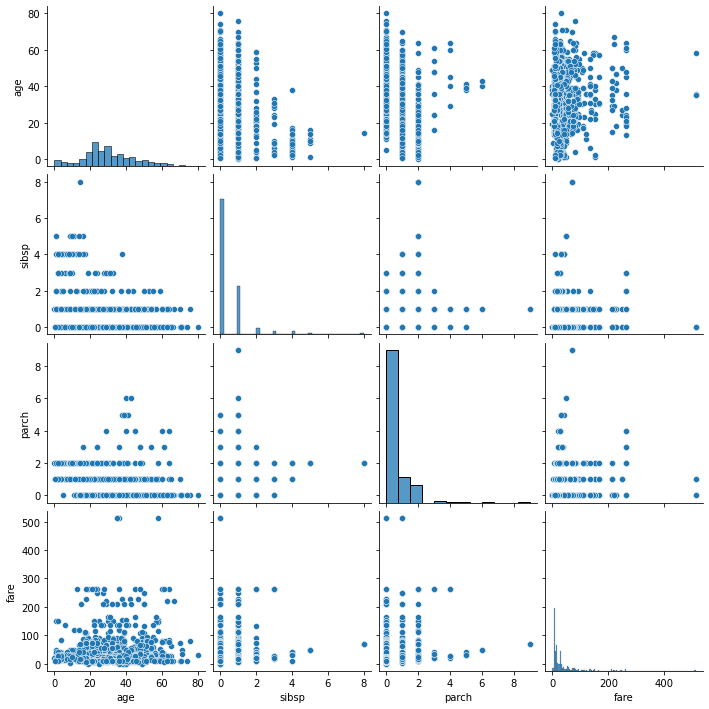

In [122]:
sns.pairplot(df)

<Figure size 360x216 with 0 Axes>

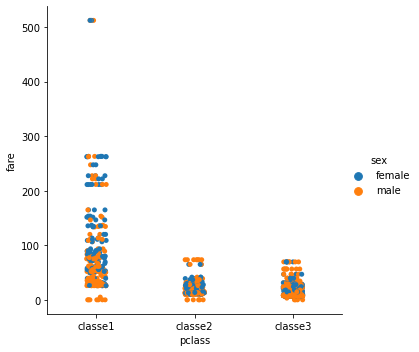

<Figure size 360x216 with 0 Axes>

In [123]:
##Relation pclass-fare
sns.catplot(x='pclass',y='fare',hue='sex',data=df)
plt.figure(figsize=(5,3))

<Figure size 360x216 with 0 Axes>

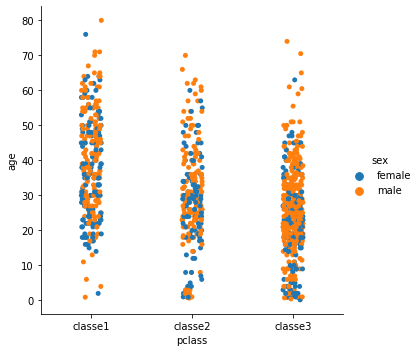

<Figure size 360x216 with 0 Axes>

In [124]:
##Relation age-pclass
sns.catplot(x='pclass',y='age',hue='sex',data=df)
plt.figure(figsize=(5,3))

<Figure size 360x216 with 0 Axes>

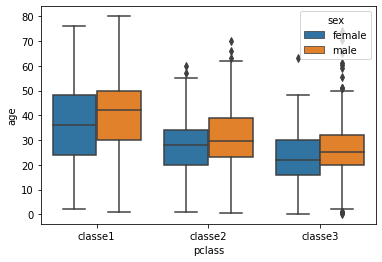

<Figure size 360x216 with 0 Axes>

In [125]:
##Relation age-survived
sns.boxplot(x='pclass',y='age',hue='sex',data=df)
plt.figure(figsize=(5,3))

La mediane des ages pour les hommes qui voyageaient en 2eme classe est de 30ans et on observe des anomalies pour les hommes et les femmes qui voyageaient pour la 2eme et 3eme classe.

<Figure size 360x216 with 0 Axes>

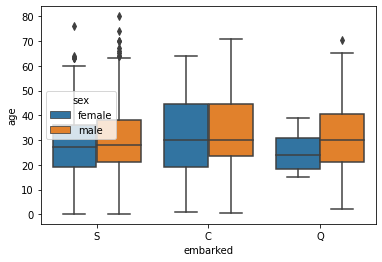

<Figure size 360x216 with 0 Axes>

In [126]:
sns.boxplot(x='embarked',y='age',hue='sex',data=df)
plt.figure(figsize=(5,3))

# Relation Target/Quantitative_feature

In [127]:
survecu_df=df[df['survived']=='Survecu']
decede_df=df[df['survived']=='Decede']

In [128]:
age_fare=['age','fare']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

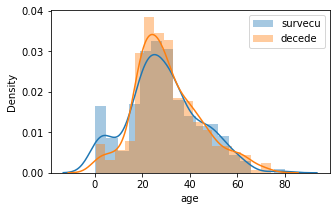

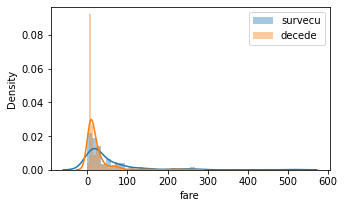

In [129]:
for col in age_fare:
    plt.figure(figsize=(5,3))
    sns.distplot(survecu_df[col],label='survecu')
    sns.distplot(decede_df[col],label='decede')
    plt.legend()

Le prix du ticket semble etre lie a la vie des passagers

# Relation Target/qualitative_feature

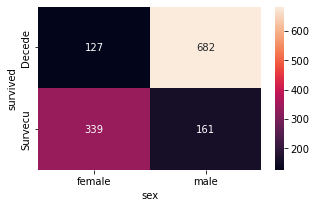

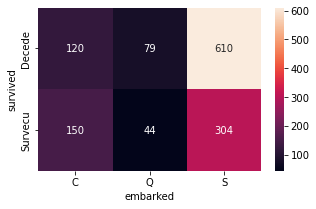

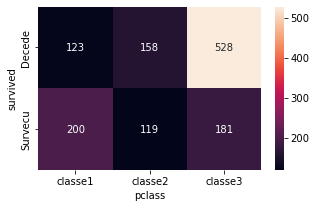

In [130]:
for col in sex_embarked_pclass:
    plt.figure(figsize=(5,3))
    sns.heatmap(pd.crosstab(df['survived'],df[col]),annot=True,fmt='d')

# Relation Qualitative_feature

In [131]:
pd.crosstab(df['sex'],df['embarked'])

embarked,C,Q,S
sex,,,
female,113,60,291
male,157,63,623


In [132]:
pd.crosstab(df['sex'],df['pclass'])

pclass,classe1,classe2,classe3
sex,,,
female,144,106,216
male,179,171,493


In [133]:
pd.crosstab(df['pclass'],df['embarked'])

embarked,C,Q,S
pclass,,,
classe1,141,3,177
classe2,28,7,242
classe3,101,113,495


<Figure size 360x216 with 0 Axes>

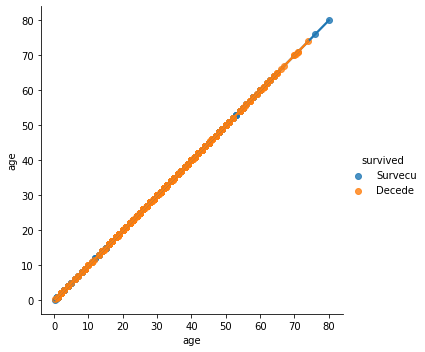

<Figure size 360x216 with 0 Axes>

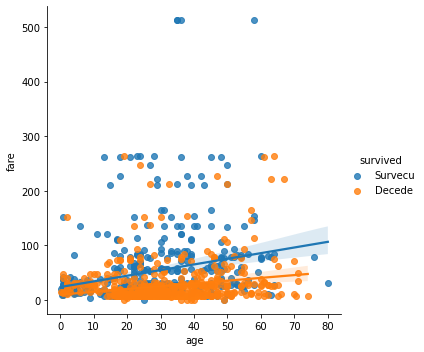

In [134]:
age_fare=['age','fare']
for col in age_fare:
    plt.figure(figsize=(5,3))
    sns.lmplot(x='age',y=col,hue='survived',data=df)

Il n'ya pas de correllation entre l'age et le ticket

# Relation Target-Age

<Figure size 1036.8x518.4 with 0 Axes>

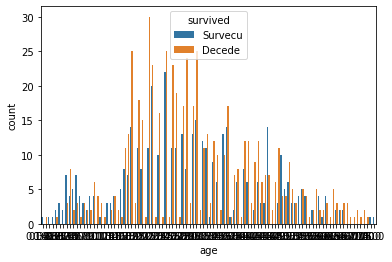

<Figure size 1036.8x518.4 with 0 Axes>

In [135]:
sns.countplot(x='age',hue='survived',data=df)
plt.figure(figsize=(14.4,7.2))

# Relation Quantitative/Qualitative feature

In [136]:
masculin_df=df[df['sex']=='male']
feminin_df=df[df['sex']=='female']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

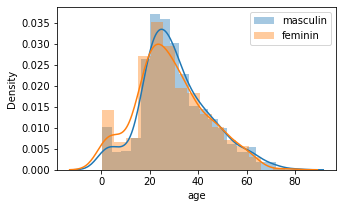

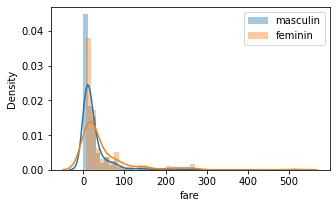

In [137]:
for col in age_fare:
    plt.figure(figsize=(5,3))
    sns.distplot(masculin_df[col],label='masculin')
    sns.distplot(feminin_df[col],label='feminin')
    plt.legend()

In [138]:
C_df=df[df['embarked']=='C']
Q_df=df[df['embarked']=='Q']
S_df=df[df['embarked']=='S']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

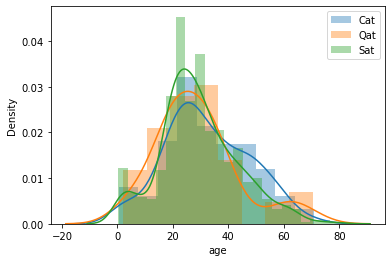

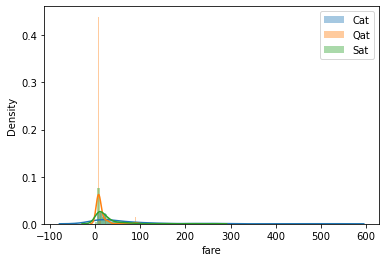

In [139]:
for col in age_fare:
    plt.figure()
    sns.distplot(C_df[col],label='Cat')
    sns.distplot(Q_df[col],label='Qat')
    sns.distplot(S_df[col],label='Sat')
    plt.legend()

In [140]:
classe1_df=df[df['pclass']=='classe1']
classe2_df=df[df['pclass']=='classe2']
classe3_df=df[df['pclass']=='classe3']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

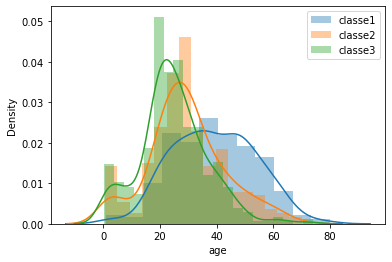

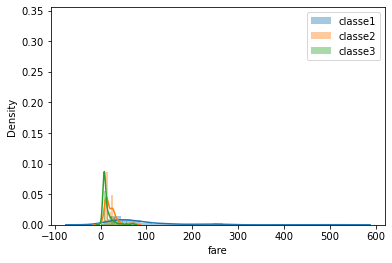

In [141]:
for col in age_fare:
    plt.figure()
    sns.distplot(classe1_df[col],label='classe1')
    sns.distplot(classe2_df[col],label='classe2')
    sns.distplot(classe3_df[col],label='classe3')
    plt.legend()

In [142]:
df.corr()

,age,sibsp,parch,fare
age,1.000000,-0.243699,-0.150917,0.178739
sibsp,-0.243699,1.000000,0.373587,0.160238
parch,-0.150917,0.373587,1.000000,0.221539
fare,0.178739,0.160238,0.221539,1.000000


# Analyse des NAN

In [143]:
df[age_fare].count()

age     1046
fare    1308
dtype: int64

In [144]:
sex_embarked_pclass=['sex','embarked','pclass']

In [145]:
df[sex_embarked_pclass].count()

sex         1309
embarked    1307
pclass      1309
dtype: int64

In [146]:
df.dropna().count()

pclass      180
survived    180
sex         180
age         180
sibsp       180
parch       180
ticket      180
fare        180
cabin       180
embarked    180
boat        180
dtype: int64

# Etat de notre target si on elimine les valeurs manquantes

In [147]:
df1 = df[age_fare]
df1['Vie']=df['survived']
df1.dropna()['Vie'].value_counts(normalize=True)

C:\Users\Kay cherubin\AppData\Local\Temp\ipykernel_2324\4027505140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Vie']=df['survived']


Decede     0.591388
Survecu    0.408612
Name: Vie, dtype: float64

In [148]:
df1 = df[sex_embarked_pclass]
df1['Vie']=df['survived']
df1.dropna()['Vie'].value_counts(normalize=True)

C:\Users\Kay cherubin\AppData\Local\Temp\ipykernel_2324\381347615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Vie']=df['survived']


Decede     0.618975
Survecu    0.381025
Name: Vie, dtype: float64

# Tests d'hypotheses

In [149]:
from scipy.stats import ttest_ind, chi2_contingency

In [150]:
survecu_df.shape

(500, 11)

In [151]:
decede_df.shape

(809, 11)

In [152]:
tita=decede_df.sample(survecu_df.shape[0])

In [153]:
def t_test(col):
    alpha=0.02
    stat, p= ttest_ind(tita[col].dropna(),survecu_df[col].dropna())
    if p< alpha:
        return 'Ho rejetee'
    else:
        return 0

In [154]:
for col in age_fare:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- 0
fare---------------------------------------------- Ho rejetee


In [155]:
stat, p, dof, ex=chi2_contingency(pd.crosstab(df['survived'],df['sex']))

In [156]:
print("Statistique du test du chi2 :", stat)
print("P-valeur du test du chi2 :", p)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :", ex)

Statistique du test du chi2 : 363.6179084388249
P-valeur du test du chi2 : 4.589924936952945e-81
Degrés de liberté : 1
Tableau des fréquences attendues : [[288.00152788 520.99847212]
 [177.99847212 322.00152788]]


In [157]:
chi2_contingency(pd.crosstab(df['survived'],df['embarked']))

(44.2417430714525,
 2.471880987482563e-10,
 2,
 array([[167.12318286,  76.13389441, 565.74292272],
        [102.87681714,  46.86610559, 348.25707728]]))

In [158]:
chi2_contingency(pd.crosstab(df['survived'],df['pclass']))

(127.85915643930328,
 1.7208259588256052e-28,
 2,
 array([[199.62337662, 171.19404125, 438.18258212],
        [123.37662338, 105.80595875, 270.81741788]]))

In [159]:
def chi2(col):
    alpha = 0.02
    stat, p, dof, ex=chi2_contingency(pd.crosstab(tita[col].dropna(),df[col].dropna()))
    if p< alpha:
        return 'Ho rejetee'
    else:
        return 0

In [160]:
for col in sex_embarked_pclass:
    print(f'{col :-<50} {chi2(col)}')

sex----------------------------------------------- Ho rejetee
embarked------------------------------------------ Ho rejetee
pclass-------------------------------------------- Ho rejetee
